In [ ]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [ ]:
m = tf.keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/035-128-classification/versions/2")
])
m.build([None, 128, 128, 3])  # Batch input shape.


In [ ]:
IMAGE_SHAPE = (128 , 128)

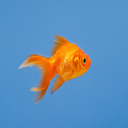

In [ ]:
gold_fish = Image.open("/content/1645674239984.jpeg").resize(IMAGE_SHAPE)
gold_fish

In [ ]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(128, 128, 3)

In [ ]:
gold_fish

array([[[0.30588235, 0.56078431, 0.78039216],
        [0.30980392, 0.56470588, 0.78431373],
        [0.30588235, 0.56078431, 0.78039216],
        ...,
        [0.32941176, 0.57647059, 0.78823529],
        [0.33333333, 0.58039216, 0.79215686],
        [0.33333333, 0.58039216, 0.79215686]],

       [[0.30980392, 0.56470588, 0.78431373],
        [0.30588235, 0.56078431, 0.78039216],
        [0.30980392, 0.56470588, 0.78431373],
        ...,
        [0.33333333, 0.58039216, 0.79215686],
        [0.33333333, 0.58039216, 0.79215686],
        [0.3372549 , 0.58431373, 0.79607843]],

       [[0.30980392, 0.56470588, 0.78431373],
        [0.30588235, 0.56078431, 0.78039216],
        [0.30588235, 0.56078431, 0.78039216],
        ...,
        [0.33333333, 0.58039216, 0.79215686],
        [0.33333333, 0.58039216, 0.79215686],
        [0.3372549 , 0.58431373, 0.79607843]],

       ...,

       [[0.26666667, 0.54117647, 0.77647059],
        [0.27843137, 0.54117647, 0.78039216],
        [0.2745098 , 0

In [ ]:
gold_fish[np.newaxis,...].shape

(1, 128, 128, 3)

In [ ]:
result = m.predict(gold_fish[np.newaxis,...])

1/1 [==============================] - 0s 21ms/step


In [ ]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [ ]:
image_labels = []
with open("/content/ImageNetLabels.txt", "r") as f:
  image_labels = f.read().splitlines()

image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [ ]:
image_labels[predicted_label_index]

'goldfish'

In [ ]:
dataset_url = "http://download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin = dataset_url, cache_dir = '.', untar = True)

228813984/228813984 [==============================] - 11s 0us/step


In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [ ]:
roses = list(data_dir.glob('roses/*'))

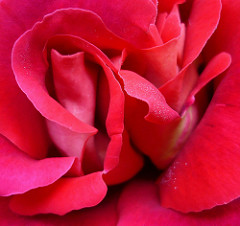

In [ ]:
Image.open(str(roses[2]))

In [ ]:
tulips = list(data_dir.glob('tulips/*'))

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))
}

In [ ]:
flowers_labels_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4
}

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 240, 3)

In [ ]:
x, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (128, 128))
        x.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
x[0]

array([[[ 66, 107,  66],
        [ 66, 108,  64],
        [ 66, 108,  63],
        ...,
        [ 69,  74,  73],
        [ 70,  75,  74],
        [ 69,  74,  73]],

       [[ 63, 109,  65],
        [ 63, 109,  63],
        [ 64, 110,  64],
        ...,
        [ 69,  74,  73],
        [ 69,  74,  73],
        [ 67,  72,  71]],

       [[ 63, 110,  64],
        [ 63, 110,  65],
        [ 64, 111,  65],
        ...,
        [ 69,  74,  73],
        [ 69,  74,  73],
        [ 67,  72,  71]],

       ...,

       [[ 63, 100,  56],
        [ 59, 100,  58],
        [ 58, 101,  60],
        ...,
        [ 69, 100,  69],
        [ 62, 100,  63],
        [ 62, 109,  62]],

       [[ 64, 104,  62],
        [ 65, 105,  64],
        [ 61, 104,  63],
        ...,
        [130, 157, 131],
        [108, 139, 107],
        [ 64, 101,  61]],

       [[ 59, 101,  64],
        [ 60, 101,  63],
        [ 55,  99,  57],
        ...,
        [ 78, 114,  78],
        [ 75, 110,  73],
        [ 66, 103,  61]]

In [ ]:
x = np.array(x)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [ ]:
x_train_s = X_train / 255
x_test_s = X_test / 255

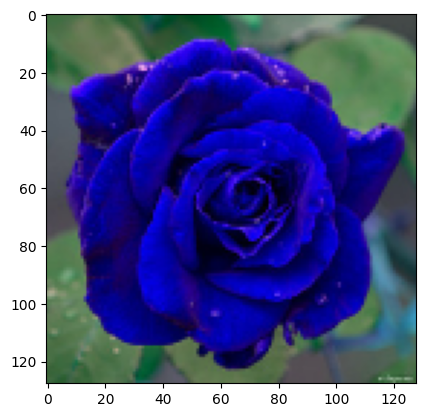

In [ ]:
plt.imshow(x[0])

In [ ]:
predicted = m.predict(np.array([x[0], x[1], x[2]]))
predicted = np.argmax(predicted, axis = 1)
predicted

1/1 [==============================] - 0s 38ms/step


array([917, 410, 905])

In [ ]:
feature_extractor_model